🔄 SEGMENTATION CLIENT - ANALYSE AVANCÉE

📂 Chargement des données...
✅ Customers: 1000 lignes, 7 colonnes
✅ Sales: 1000 lignes, 7 colonnes

🔍 Colonnes disponibles:
Customers: ['Customer_ID', 'Name', 'Age', 'Gender', 'Location', 'Join_Date', 'Total_Spent']
Sales: ['Sale_ID', 'Product_ID', 'Customer_ID', 'Date', 'Quantity', 'Sale_Price', 'Channel']

🎯 Colonnes identifiées:
Customer ID (customers): Customer_ID
Customer ID (sales): Customer_ID
Age: Age
Amount: None
❌ Aucune colonne de montant trouvée dans sales
   Colonnes disponibles: ['Sale_ID', 'Product_ID', 'Customer_ID', 'Date', 'Quantity', 'Sale_Price', 'Channel']
💡 Recherche de colonnes contenant 'price', 'total', 'value', 'revenue', 'amount'...
   Colonnes numériques potentielles: ['Sale_Price']
✅ Utilisation de 'Sale_Price' comme colonne de montant

💰 Calcul des métriques client...
✅ Date de référence pour la récence: 2023-12-30 00:00:00
✅ Métriques RFM calculées pour 635 clients
✅ Métriques calculées pour 635 clients

🔗 Fusion de

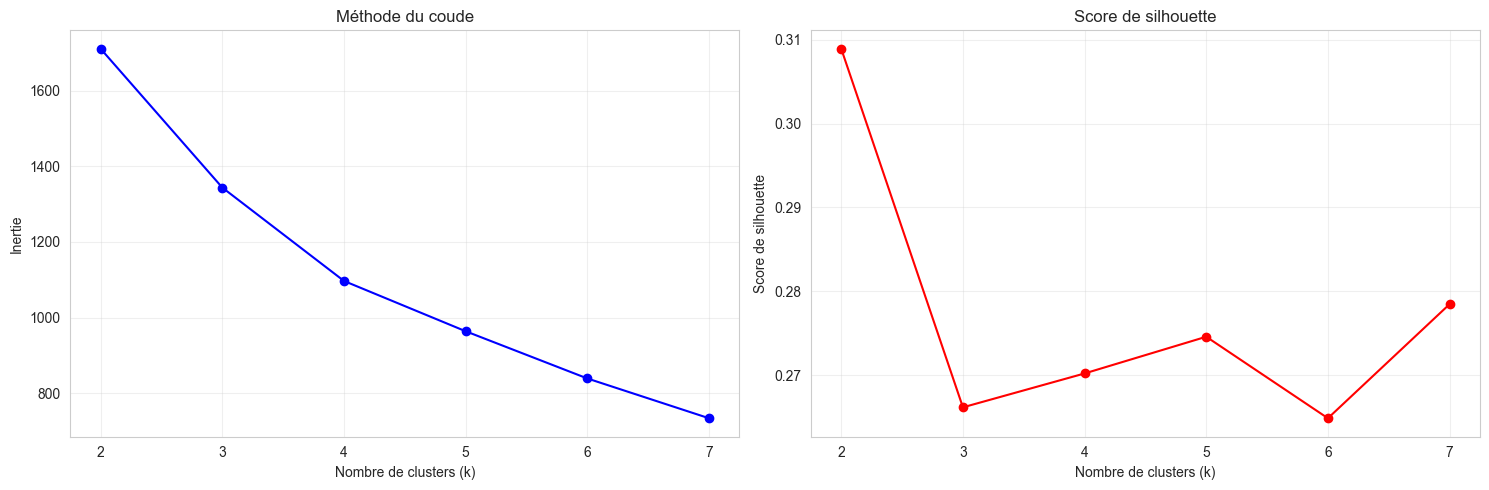

✅ Nombre optimal de clusters (silhouette): 2
📊 Meilleur score de silhouette: 0.309

🎯 Application du clustering avec 2 clusters...
✅ Clustering terminé
📊 Répartition des clusters:
   Cluster 0: 408 clients (64.3%)
   Cluster 1: 227 clients (35.7%)

📈 PROFILS DES CLUSTERS
           Age              Recency               Frequency              \
          mean    std count    mean     std count      mean   std count   
cluster                                                                   
0        46.73  18.29   408  187.00  105.28   408      1.09  0.28   408   
1        45.95  16.58   227   93.67   69.66   227      2.45  0.70   227   

        Monetary               
            mean    std count  
cluster                        
0          69.53  42.20   408  
1         191.61  87.18   227  

🎨 Génération des visualisations...
📊 Variance expliquée par PCA: PC1=47.4%, PC2=25.0%


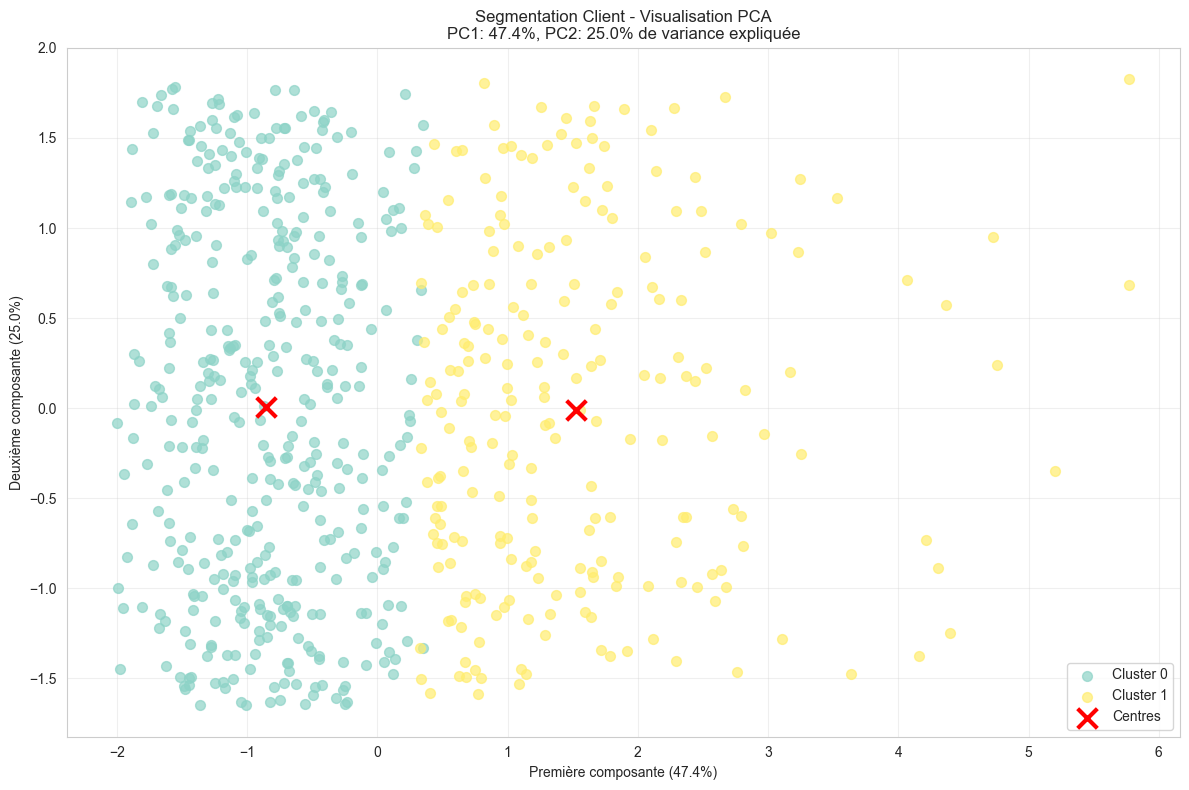

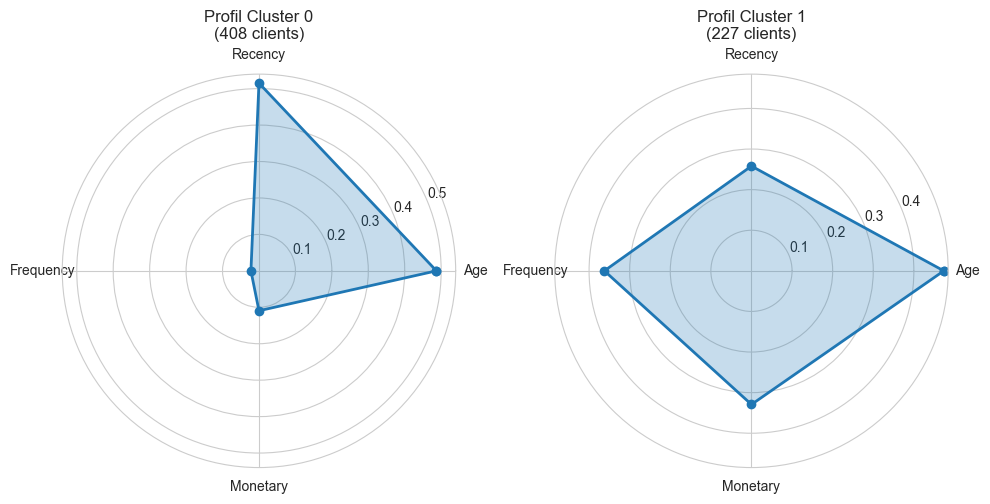

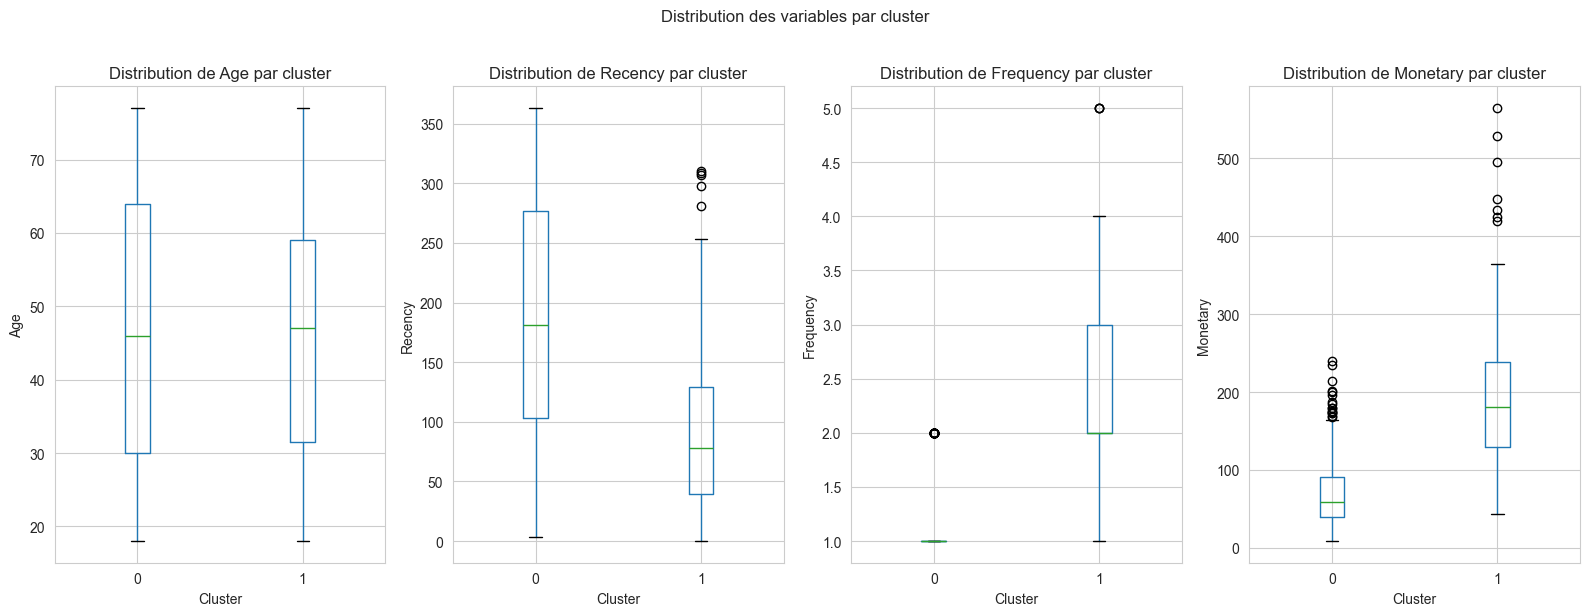


📋 RÉCAPITULATIF DE LA SEGMENTATION
🎯 Nombre de clusters: 2
📊 Variables utilisées: Age, Recency, Frequency, Monetary
👥 Total clients segmentés: 635
🏆 Score de silhouette: 0.309

💡 INTERPRÉTATION DES CLUSTERS:

🏷️  CLUSTER 0 (408 clients):
   📅 Âge moyen: 46.7 ans
   ⏰ Récence: 187 jours (dernier achat)
   🔄 Fréquence: 1.1 achats
   💰 Valeur monétaire: 69.53€

🏷️  CLUSTER 1 (227 clients):
   📅 Âge moyen: 46.0 ans
   ⏰ Récence: 94 jours (dernier achat)
   🔄 Fréquence: 2.4 achats
   💰 Valeur monétaire: 191.61€

✅ Segmentation terminée avec succès!


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("🔄 SEGMENTATION CLIENT - ANALYSE AVANCÉE")
print("=" * 60)

try:
    # 📂 Chargement des données
    print("\n📂 Chargement des données...")
    customers = pd.read_csv('../data/customers_data.csv')
    sales = pd.read_csv('../data/sales_data.csv')
    print(f"✅ Customers: {customers.shape[0]} lignes, {customers.shape[1]} colonnes")
    print(f"✅ Sales: {sales.shape[0]} lignes, {sales.shape[1]} colonnes")
    
except FileNotFoundError as e:
    print(f"❌ Erreur : {e}")
    print("💡 Vérifiez que les fichiers CSV sont dans '../data/'")
    exit()

# 🔍 Exploration des colonnes disponibles
print(f"\n🔍 Colonnes disponibles:")
print(f"Customers: {list(customers.columns)}")
print(f"Sales: {list(sales.columns)}")

# 🔗 Identification des colonnes pour la jointure et l'analyse
# Recherche flexible des noms de colonnes
customer_id_cols = ['customer_id', 'Customer_ID', 'CustomerID', 'id', 'ID', 'client_id']
amount_cols = ['amount', 'Amount', 'total', 'price', 'value', 'revenue', 'sales_amount']
age_cols = ['age', 'Age', 'customer_age', 'client_age']

# Identification des colonnes dans customers
customers_id_col = None
age_col = None

for col in customer_id_cols:
    if col in customers.columns:
        customers_id_col = col
        break

for col in age_cols:
    if col in customers.columns:
        age_col = col
        break

# Identification des colonnes dans sales
sales_id_col = None
amount_col = None

for col in customer_id_cols:
    if col in sales.columns:
        sales_id_col = col
        break

for col in amount_cols:
    if col in sales.columns:
        amount_col = col
        break

print(f"\n🎯 Colonnes identifiées:")
print(f"Customer ID (customers): {customers_id_col}")
print(f"Customer ID (sales): {sales_id_col}")
print(f"Age: {age_col}")
print(f"Amount: {amount_col}")

# Vérification de la disponibilité des colonnes essentielles
if not customers_id_col:
    print("❌ Aucune colonne ID client trouvée dans customers")
    print(f"   Colonnes disponibles: {list(customers.columns)}")
    exit()
if not sales_id_col:
    print("❌ Aucune colonne ID client trouvée dans sales")
    print(f"   Colonnes disponibles: {list(sales.columns)}")
    exit()
if not amount_col:
    print("❌ Aucune colonne de montant trouvée dans sales")
    print(f"   Colonnes disponibles: {list(sales.columns)}")
    print("💡 Recherche de colonnes contenant 'price', 'total', 'value', 'revenue', 'amount'...")
    
    # Recherche plus large de colonnes numériques qui pourraient être des montants
    numeric_cols = sales.select_dtypes(include=['number']).columns.tolist()
    potential_amount_cols = [col for col in numeric_cols 
                           if any(keyword in col.lower() for keyword in ['price', 'total', 'value', 'revenue', 'amount', 'cost', 'sum'])]
    
    if potential_amount_cols:
        print(f"   Colonnes numériques potentielles: {potential_amount_cols}")
        amount_col = potential_amount_cols[0]  # Prendre la première trouvée
        print(f"✅ Utilisation de '{amount_col}' comme colonne de montant")
    else:
        print(f"   Toutes les colonnes numériques: {numeric_cols}")
        if numeric_cols:
            amount_col = numeric_cols[0]  # Prendre la première colonne numérique
            print(f"⚠️ Utilisation de '{amount_col}' par défaut (première colonne numérique)")
        else:
            print("❌ Aucune colonne numérique trouvée")
            exit()

# Double vérification après recherche étendue
if not amount_col:
    print("❌ Impossible de trouver une colonne de montant utilisable")
    exit()

# 💰 Calcul des métriques RFM (Récence, Fréquence, Valeur monétaire)
print(f"\n💰 Calcul des métriques client...")

# Recherche d'une colonne de date pour la récence
date_cols = ['date', 'Date', 'sale_date', 'order_date', 'transaction_date', 'purchase_date']
date_col = None

for col in date_cols:
    if col in sales.columns:
        date_col = col
        break

# Calcul des métriques par client
customer_metrics = []

if date_col:
    # Conversion des dates
    try:
        sales[date_col] = pd.to_datetime(sales[date_col], errors='coerce')
        reference_date = sales[date_col].max()
        print(f"✅ Date de référence pour la récence: {reference_date}")
        
        # Calcul RFM complet
        try:
            rfm = sales.groupby(sales_id_col).agg({
                date_col: lambda x: (reference_date - x.max()).days,  # Récence
                amount_col: ['count', 'sum']  # Fréquence et valeur monétaire
            }).reset_index()
            
            # Aplatissement des colonnes multi-niveau
            rfm.columns = [sales_id_col, 'recency', 'frequency', 'monetary']
            customer_metrics = rfm
            
            print(f"✅ Métriques RFM calculées pour {len(customer_metrics)} clients")
            
        except Exception as e:
            print(f"⚠️ Erreur dans le calcul RFM: {e}")
            date_col = None  # Forcer le calcul FM
        
    except Exception as e:
        print(f"⚠️ Erreur avec les dates: {e}")
        date_col = None

if not date_col or len(customer_metrics) == 0:
    # Calcul FM sans récence
    print("⚠️ Calcul sans récence (pas de colonne date valide)")
    
    # Vérification finale des colonnes avant agrégation
    print(f"🔍 Vérification des colonnes avant agrégation:")
    print(f"   sales_id_col: '{sales_id_col}' (existe: {sales_id_col in sales.columns})")
    print(f"   amount_col: '{amount_col}' (existe: {amount_col in sales.columns})")
    
    if sales_id_col not in sales.columns:
        print(f"❌ Erreur: colonne '{sales_id_col}' introuvable dans sales")
        exit()
    
    if amount_col not in sales.columns:
        print(f"❌ Erreur: colonne '{amount_col}' introuvable dans sales")
        exit()
    
    try:
        # Nettoyage préalable des données
        sales_clean = sales.dropna(subset=[sales_id_col, amount_col])
        
        # Conversion en numérique pour amount_col
        sales_clean[amount_col] = pd.to_numeric(sales_clean[amount_col], errors='coerce')
        sales_clean = sales_clean.dropna(subset=[amount_col])
        
        print(f"📊 Données nettoyées: {len(sales_clean)} transactions valides")
        
        if len(sales_clean) == 0:
            print("❌ Aucune transaction valide après nettoyage")
            exit()
        
        # Agrégation corrigée
        fm = sales_clean.groupby(sales_id_col).agg({
            amount_col: ['count', 'sum']  # Fréquence et valeur monétaire
        }).reset_index()
        
        # Aplatissement des colonnes multi-niveau
        fm.columns = [sales_id_col, 'frequency', 'monetary']
        customer_metrics = fm
        
        print(f"✅ Métriques FM calculées pour {len(customer_metrics)} clients")
        
    except Exception as e:
        print(f"❌ Erreur lors du calcul des métriques: {e}")
        print("🔍 Affichage des premières lignes de sales pour diagnostic:")
        print(sales[[sales_id_col, amount_col]].head())
        print(f"🔍 Types de données:")
        print(sales[[sales_id_col, amount_col]].dtypes)
        exit()

print(f"✅ Métriques calculées pour {len(customer_metrics)} clients")

# 🔗 Fusion avec les données client
print(f"\n🔗 Fusion des données...")

# Vérification des données avant fusion
print(f"📊 Avant fusion:")
print(f"   Customers: {len(customers)} lignes")
print(f"   Customer_metrics: {len(customer_metrics)} lignes")
print(f"   Colonnes de jointure: '{customers_id_col}' ↔ '{sales_id_col}'")

# Vérification de la cohérence des IDs
customers_ids = set(customers[customers_id_col].dropna().astype(str))
metrics_ids = set(customer_metrics[sales_id_col].dropna().astype(str))
common_ids = customers_ids.intersection(metrics_ids)

print(f"   IDs dans customers: {len(customers_ids)}")
print(f"   IDs dans metrics: {len(metrics_ids)}")
print(f"   IDs communs: {len(common_ids)}")

if len(common_ids) == 0:
    print("❌ Aucun ID commun trouvé entre customers et sales!")
    print("🔍 Diagnostic des types de données:")
    print(f"   Customers[{customers_id_col}] type: {customers[customers_id_col].dtype}")
    print(f"   Metrics[{sales_id_col}] type: {customer_metrics[sales_id_col].dtype}")
    print("🔍 Échantillons d'IDs:")
    print(f"   Customers (5 premiers): {list(customers[customers_id_col].head())}")
    print(f"   Metrics (5 premiers): {list(customer_metrics[sales_id_col].head())}")
    
    # Tentative de conversion pour harmoniser les types
    try:
        customers[customers_id_col] = customers[customers_id_col].astype(str)
        customer_metrics[sales_id_col] = customer_metrics[sales_id_col].astype(str)
        print("✅ Conversion en string effectuée")
    except Exception as e:
        print(f"❌ Erreur de conversion: {e}")
        exit()

try:
    df = pd.merge(customers, customer_metrics, 
                  left_on=customers_id_col, right_on=sales_id_col, 
                  how='inner')
    print(f"✅ Fusion réussie: {len(df)} clients avec historique d'achat")
    
    # Vérification des clients perdus
    lost_customers = len(customers) - len(df)
    if lost_customers > 0:
        print(f"⚠️ {lost_customers} clients sans historique d'achat exclus")
    
    if len(df) == 0:
        print("❌ Aucun client après fusion - problème de cohérence des IDs")
        exit()
    
except Exception as e:
    print(f"❌ Erreur lors de la fusion: {e}")
    exit()

# 📊 Préparation des variables pour le clustering
print(f"\n📊 Préparation des variables...")

# Construction du jeu de variables
variables_for_clustering = []
variable_names = []

# Ajout de l'âge si disponible
if age_col and age_col in df.columns:
    df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
    median_age = df[age_col].median()
    df[age_col] = df[age_col].fillna(median_age)
    variables_for_clustering.append(df[age_col])
    variable_names.append('Age')
    print(f"✅ Age ajouté (valeurs manquantes: {df[age_col].isnull().sum()})")

# Ajout de la récence si disponible
if 'recency' in df.columns:
    variables_for_clustering.append(df['recency'])
    variable_names.append('Recency')
    print(f"✅ Récence ajoutée")

# Ajout de la fréquence
if 'frequency' in df.columns:
    variables_for_clustering.append(df['frequency'])
    variable_names.append('Frequency')
    print(f"✅ Fréquence ajoutée")

# Ajout de la valeur monétaire
if 'monetary' in df.columns:
    # Nettoyage des valeurs monétaires
    df['monetary'] = pd.to_numeric(df['monetary'], errors='coerce').fillna(0)
    variables_for_clustering.append(df['monetary'])
    variable_names.append('Monetary')
    print(f"✅ Valeur monétaire ajoutée")

if len(variables_for_clustering) < 2:
    print("❌ Pas assez de variables pour le clustering")
    exit()

# Construction de la matrice X
X = pd.DataFrame(dict(zip(variable_names, variables_for_clustering)))
print(f"\n📈 Matrice de clustering: {X.shape[0]} clients × {X.shape[1]} variables")
print(f"Variables utilisées: {variable_names}")

# Affichage des statistiques descriptives
print(f"\n📊 Statistiques descriptives:")
print(X.describe().round(2))

# 🔍 Détermination du nombre optimal de clusters
print(f"\n🔍 Détermination du nombre optimal de clusters...")

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Méthode du coude (Elbow Method)
inertias = []
silhouette_scores = []
K_range = range(2, min(8, len(X)//10 + 2))  # Éviter trop de clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
    if len(X) > k:  # Assurer qu'on a assez de points
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)

# Visualisation de l'analyse du nombre de clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Méthode du coude
ax1.plot(K_range, inertias, 'bo-')
ax1.set_title('Méthode du coude')
ax1.set_xlabel('Nombre de clusters (k)')
ax1.set_ylabel('Inertie')
ax1.grid(True, alpha=0.3)

# Score de silhouette
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_title('Score de silhouette')
ax2.set_xlabel('Nombre de clusters (k)')
ax2.set_ylabel('Score de silhouette')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sélection automatique du nombre de clusters
if silhouette_scores:
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"✅ Nombre optimal de clusters (silhouette): {optimal_k}")
    print(f"📊 Meilleur score de silhouette: {max(silhouette_scores):.3f}")
else:
    optimal_k = 3  # Valeur par défaut

# 🎯 Clustering final
print(f"\n🎯 Application du clustering avec {optimal_k} clusters...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Ajout des clusters au DataFrame
df['cluster'] = clusters
X['cluster'] = clusters

print(f"✅ Clustering terminé")
print(f"📊 Répartition des clusters:")
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(df) * 100
    print(f"   Cluster {cluster_id}: {count} clients ({percentage:.1f}%)")

# 📈 Analyse des profils de clusters
print(f"\n📈 PROFILS DES CLUSTERS")
print("=" * 40)

cluster_profiles = X.groupby('cluster').agg(['mean', 'std', 'count']).round(2)
print(cluster_profiles)

# 🎨 Visualisations avancées
print(f"\n🎨 Génération des visualisations...")

# 1. PCA pour visualisation 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée par les composantes
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PCA: PC1={explained_variance[0]:.1%}, PC2={explained_variance[1]:.1%}")

# Visualisation PCA
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    cluster_mask = clusters == i
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)

# Ajout des centres de clusters dans l'espace PCA
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centres')

plt.title(f'Segmentation Client - Visualisation PCA\n'
          f'PC1: {explained_variance[0]:.1%}, PC2: {explained_variance[1]:.1%} de variance expliquée')
plt.xlabel(f'Première composante ({explained_variance[0]:.1%})')
plt.ylabel(f'Deuxième composante ({explained_variance[1]:.1%})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Visualisation des profils par radar chart
if len(variable_names) >= 3:
    fig, axes = plt.subplots(1, optimal_k, figsize=(5*optimal_k, 5), 
                            subplot_kw=dict(projection='polar'))
    if optimal_k == 1:
        axes = [axes]
    
    # Normalisation pour radar chart (0-1)
    X_radar = X.drop('cluster', axis=1)
    X_radar_norm = (X_radar - X_radar.min()) / (X_radar.max() - X_radar.min())
    
    angles = np.linspace(0, 2*np.pi, len(variable_names), endpoint=False).tolist()
    angles += angles[:1]  # Fermer le cercle
    
    for i in range(optimal_k):
        cluster_data = X_radar_norm[X['cluster'] == i].mean().tolist()
        cluster_data += cluster_data[:1]  # Fermer le cercle
        
        axes[i].plot(angles, cluster_data, 'o-', linewidth=2, label=f'Cluster {i}')
        axes[i].fill(angles, cluster_data, alpha=0.25)
        axes[i].set_xticks(angles[:-1])
        axes[i].set_xticklabels(variable_names)
        axes[i].set_title(f'Profil Cluster {i}\n({cluster_counts[i]} clients)')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# 3. Box plots pour chaque variable
fig, axes = plt.subplots(1, len(variable_names), figsize=(4*len(variable_names), 6))
if len(variable_names) == 1:
    axes = [axes]

for i, var in enumerate(variable_names):
    X.boxplot(column=var, by='cluster', ax=axes[i])
    axes[i].set_title(f'Distribution de {var} par cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

plt.suptitle('Distribution des variables par cluster', y=1.02)
plt.tight_layout()
plt.show()

# 📋 Récapitulatif et recommandations
print(f"\n📋 RÉCAPITULATIF DE LA SEGMENTATION")
print("=" * 50)
print(f"🎯 Nombre de clusters: {optimal_k}")
print(f"📊 Variables utilisées: {', '.join(variable_names)}")
print(f"👥 Total clients segmentés: {len(df)}")
print(f"🏆 Score de silhouette: {silhouette_score(X_scaled, clusters):.3f}")

print(f"\n💡 INTERPRÉTATION DES CLUSTERS:")
for i in range(optimal_k):
    cluster_data = X[X['cluster'] == i]
    print(f"\n🏷️  CLUSTER {i} ({len(cluster_data)} clients):")
    
    for var in variable_names:
        mean_val = cluster_data[var].mean()
        overall_mean = X[var].mean()
        
        if var == 'Age':
            print(f"   📅 Âge moyen: {mean_val:.1f} ans")
        elif var == 'Recency':
            print(f"   ⏰ Récence: {mean_val:.0f} jours (dernier achat)")
        elif var == 'Frequency':
            print(f"   🔄 Fréquence: {mean_val:.1f} achats")
        elif var == 'Monetary':
            print(f"   💰 Valeur monétaire: {mean_val:.2f}€")

print(f"\n✅ Segmentation terminée avec succès!")